In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
import re

In [3]:
#load the dataset
df = pd.read_csv("Reviews.csv")
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [6]:
#Data cleaning

#Drop unnecessary columns
df = df[['Text','Score']]

#Handle missing values
df.dropna(inplace=True)

#Remove duplicates
df.drop_duplicates(inplace=True)

#Covert Score to sentiment(1-2: Negative, 3:Neutral, 4-5: Positive)
df['Sentiment'] = df['Score'].apply(lambda x: 'Positive' if x > 3 else ('Negative' if x < 3 else 'Neutral'))

#Display the cleaned Data
print(df.head())

                                                Text  Score Sentiment
0  I have bought several of the Vitality canned d...      5  Positive
1  Product arrived labeled as Jumbo Salted Peanut...      1  Negative
2  This is a confection that has been around a fe...      4  Positive
3  If you are looking for the secret ingredient i...      2  Negative
4  Great taffy at a great price.  There was a wid...      5  Positive


In [13]:
#Text Preprocessing

#Download stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#Function to clean text
def clean_text(text):
    #remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]','', text)
    #covert to lowercase
    text = text.lower()
    #remoe stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
    
#Apply cleaning to the text column
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Display cleaned text
print(df[['Text', 'Cleaned_Text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a8112\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        Cleaned_Text  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanutsth...  
2  confection around centuries light pillowy citr...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...  


In [15]:
#Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

#apply sentiment analysis
df['Polarity'] = df['Cleaned_Text'].apply(get_sentiment)

# Classify sentiment based on polarity
df['Predicted_Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display results
print(df[['Text', 'Sentiment', 'Predicted_Sentiment']].head())

                                                Text Sentiment  \
0  I have bought several of the Vitality canned d...  Positive   
1  Product arrived labeled as Jumbo Salted Peanut...  Negative   
2  This is a confection that has been around a fe...  Positive   
3  If you are looking for the secret ingredient i...  Negative   
4  Great taffy at a great price.  There was a wid...  Positive   

  Predicted_Sentiment  
0            Positive  
1            Positive  
2            Positive  
3            Positive  
4            Positive  


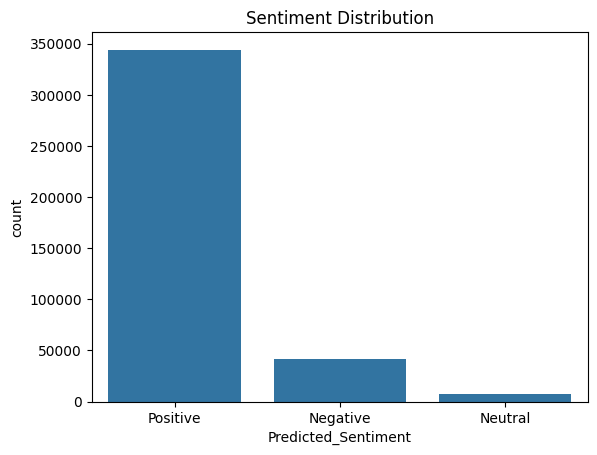

In [16]:
#Plot sentiment distribution
sns.countplot(x='Predicted_Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [17]:
git add.

SyntaxError: invalid syntax (3081662196.py, line 1)